In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
dengue = pd.read_csv('datasets//dengue.csv')

In [6]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [7]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [8]:
dengue.dtypes


Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [9]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [10]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [11]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>INSIGHT 1</h1>

<h3>Base on the result, Dengue cases tend to peak during the rainy months, particularly from July to September, due to ideal mosquito breeding conditions. The highest number of cases often occur in August and September, followed by a decline towards the cooler months of November to February, suggesting weather plays a crucial role in transmission. These seasonal patterns highlight the need for proactive mosquito control and preventive efforts before the peak months to minimize outbreaks.</h3>

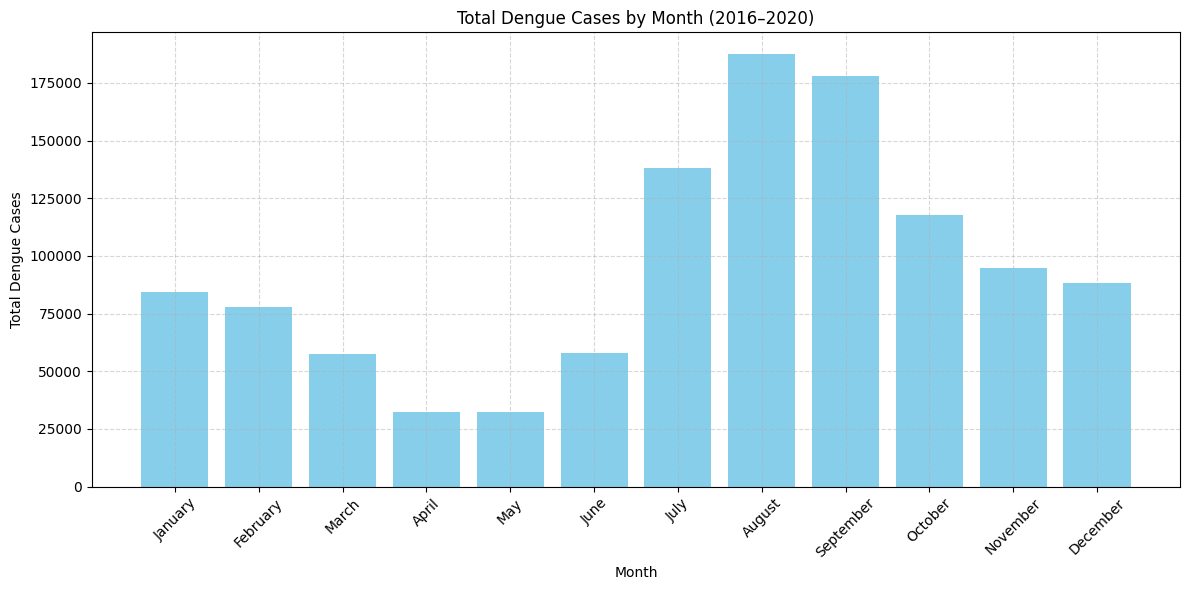

In [12]:
monthly_cases = dengue.groupby('Month', as_index=False)['Dengue_Cases'].sum()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_cases['Month'] = pd.Categorical(monthly_cases['Month'], categories=month_order, ordered=True)
monthly_cases = monthly_cases.sort_values('Month')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_cases['Month'], monthly_cases['Dengue_Cases'], color='skyblue')
plt.title('Total Dengue Cases by Month (2016–2020)')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<h1>INSIGHT 2</h1>

<h3>Based on the result, the yearly dengue case trends show significant fluctuations, with noticeable spikes in certain years, particularly in 2019, indicating a major outbreak. This surge could be linked to environmental factors, public health interventions, or mosquito population dynamics. A sharp decline in 2020 suggests that the pandemic-related lockdowns, reduced mobility, and heightened hygiene measures played a crucial role in limiting transmission. These trends highlight the importance of sustained mosquito control efforts and early preventive strategies to mitigate future outbreaks.
</h3>

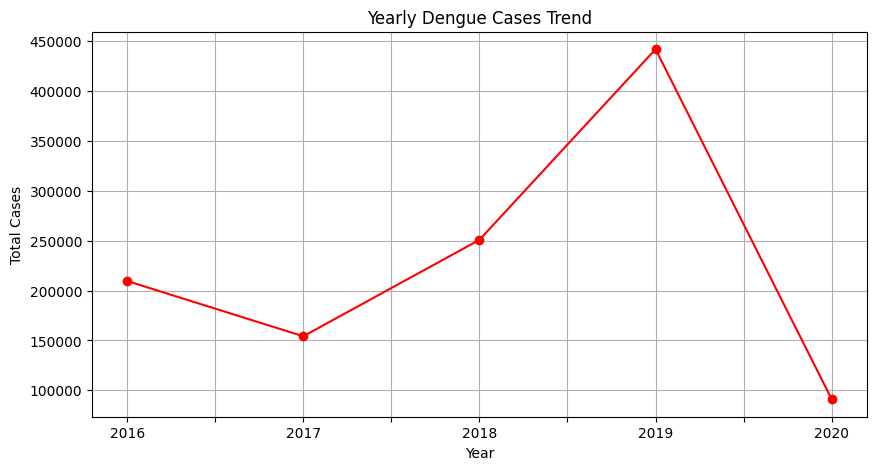

In [13]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(10,5))
yearly_cases.plot(kind="line", marker="o", color="red")
plt.title("Yearly Dengue Cases Trend")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()

<h1>INSIGHT 3</h1>

<h3>Based on the result, certain regions report significantly higher dengue cases than others, with Region IV-A,Region III, Region VI, and NCR experiencing the highest numbers. These variations likely stem from population density, urban conditions, and environmental factors that support mosquito breeding. The differences in cases highlight disparities in public health interventions and weather-related influences, reinforcing the need for targeted prevention efforts in high-risk areas before peak transmission seasons.
</h3>

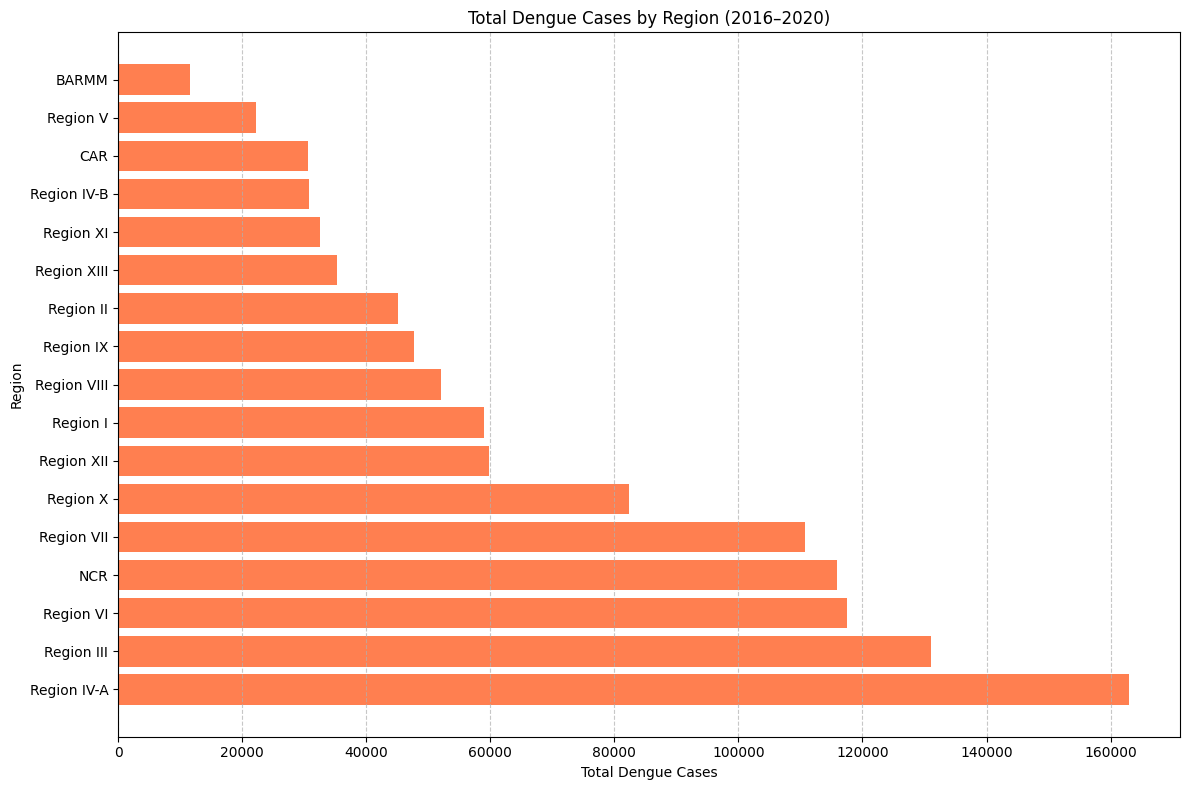

In [14]:
region_cases = dengue.groupby('Region', as_index=False)['Dengue_Cases'].sum().sort_values(by='Dengue_Cases', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(region_cases['Region'], region_cases['Dengue_Cases'], color='coral')
plt.title('Total Dengue Cases by Region (2016–2020)')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>INSIGHT 4</h1>

<h3>The heatmap of dengue cases by region and year shows clear variations across different areas. Region IV-A, Region VI, and NCR consistently experience high dengue cases, indicating persistent outbreaks and environmental conditions favorable for mosquito breeding. A significant surge in cases occurred in 2019, reflecting a major outbreak across multiple regions, possibly influenced by weather patterns and public health measures. In contrast, a sharp decline is evident in 2020, likely due to the impact of pandemic-related restrictions, reduced mobility, and increased hygiene awareness. These regional patterns emphasize the importance of targeted mosquito control efforts and strategic health interventions in historically high-risk areas to prevent future outbreaks.
</h3>

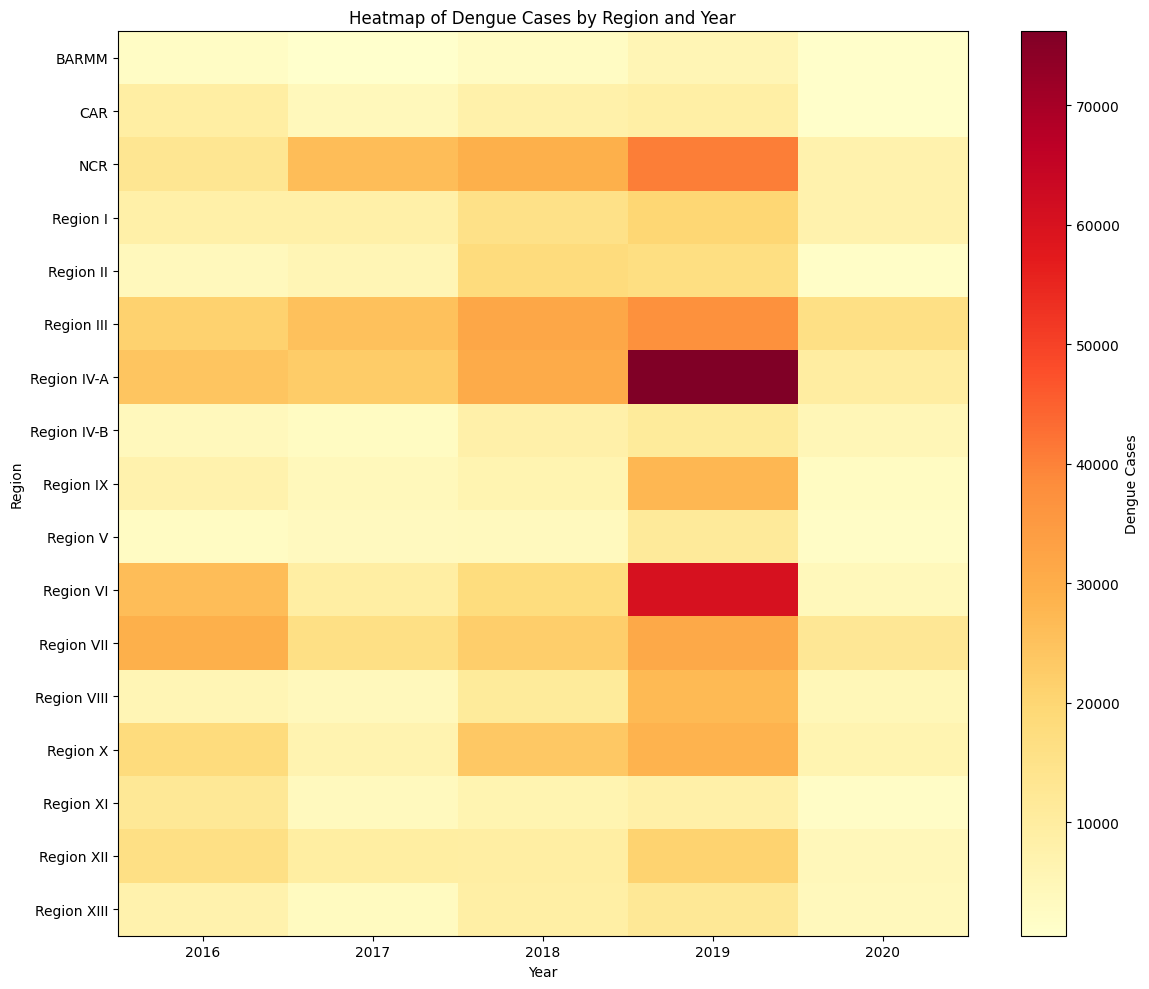

In [15]:
pivot_table = dengue.pivot_table(index='Region', columns='Year', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 10))
plt.imshow(pivot_table, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Dengue Cases')
plt.title('Heatmap of Dengue Cases by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)
plt.tight_layout()
plt.show()

<h1>INSIGHT 5</h1>

<h3>Regions with high dengue cases also tend to report significant dengue-related deaths, indicating possible gaps in healthcare accessibility and intervention efforts. Region IV-A, Region VI, and NCR have the highest total cases, suggesting densely populated areas and favorable mosquito breeding conditions contribute to outbreaks. Similarly, regions with elevated fatality numbers highlight the need for strengthened medical response and public health initiatives. These findings reinforce the importance of early prevention strategies, targeted mosquito control measures, and improved healthcare services to reduce both the incidence and severity of dengue infections.
</h3>

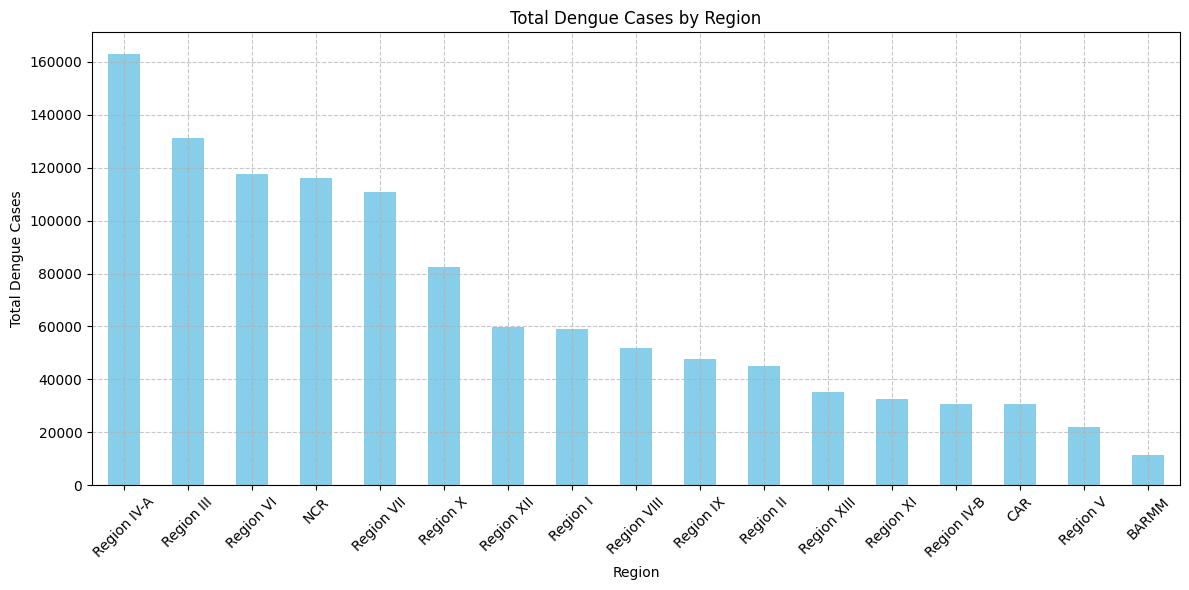

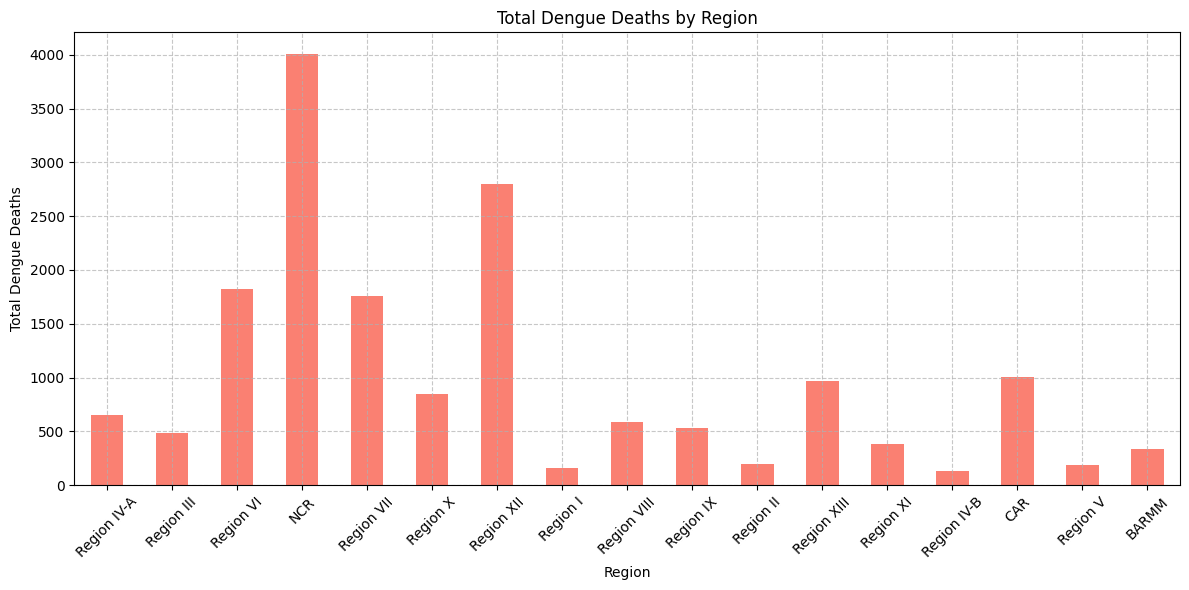

In [16]:
dengue_grouped = dengue.groupby("Region").agg(
    Total_Cases=("Dengue_Cases", "sum"),
    Total_Deaths=("Dengue_Deaths", "sum")
).sort_values(by="Total_Cases", ascending=False)

#Visualization - Bar chart for total dengue cases by region
plt.figure(figsize=(12, 6))
dengue_grouped['Total_Cases'].plot(kind='bar', color='skyblue')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Visualization - Bar chart for total dengue deaths by region
plt.figure(figsize=(12, 6))
dengue_grouped['Total_Deaths'].plot(kind='bar', color='salmon')
plt.title('Total Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>INSIGHT 6</h1>

<h3>This visualization shown the fatality rates rather than total cases, providing insights into the severity of dengue infections across regions and months. Certain months show higher fatality rates, indicating potential delays in medical response or spikes in severe dengue strains. Regions with consistently high fatality rates might need improved healthcare interventions, faster diagnosis, and increased patient awareness to reduce mortality.</h3>

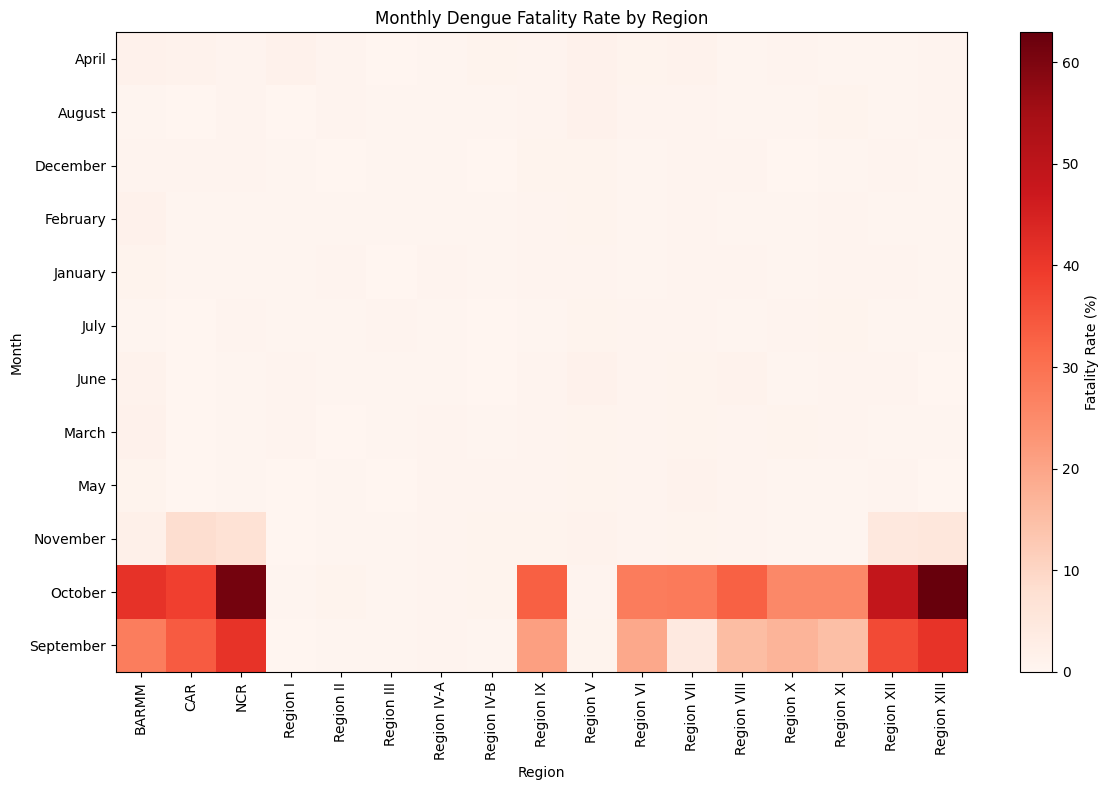

In [17]:
dengue['Fatality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100
fatality_rate = dengue.groupby(['Region', 'Month'], as_index=False)['Fatality_Rate'].mean()

# Pivot the data for visualization
pivot_table = fatality_rate.pivot(index='Month', columns='Region', values='Fatality_Rate')

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pivot_table, cmap='Reds', aspect='auto')
plt.colorbar(label='Fatality Rate (%)')
plt.title('Monthly Dengue Fatality Rate by Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.tight_layout()
plt.show()

<h1>INSIGHT 7</h1>

<h3>The visualization shows the proportion of dengue cases that led to deaths over the years, reflecting trends in disease severity and healthcare response. Some years exhibit higher fatality proportions, suggesting potential delays in treatment or outbreaks with more severe dengue strains. A gradual decline in fatality proportion over time may indicate improved medical interventions, early diagnosis, and better disease management. However, spikes in certain years highlight the need for sustained public health efforts to further reduce dengue-related mortality.</h3>

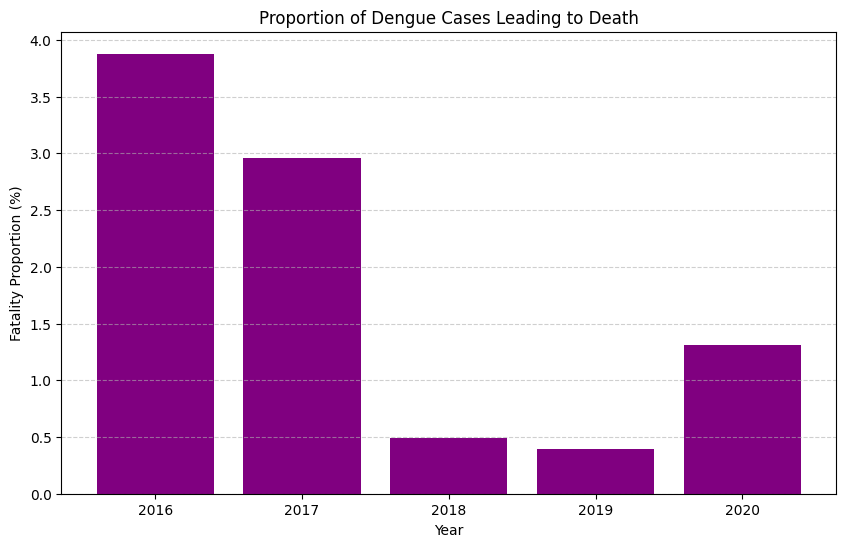

In [18]:
fatality_proportion = dengue.groupby("Year").agg(Deaths=("Dengue_Deaths", "sum"), Cases=("Dengue_Cases", "sum"))
fatality_proportion["Fatality_Proportion"] = fatality_proportion["Deaths"] / fatality_proportion["Cases"]
plt.figure(figsize=(10, 6))
plt.bar(fatality_proportion.index, fatality_proportion["Fatality_Proportion"] * 100, color="purple")
plt.title("Proportion of Dengue Cases Leading to Death")
plt.xlabel("Year")
plt.ylabel("Fatality Proportion (%)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


<h1>INSIGHT 8</h1>

<h3>The pie chart illustrates the distribution of dengue cases across different regions, highlighting that certain areas bear a significantly higher burden of infections. Region IV-A, NCR, and Region VI collectively account for the largest proportion of cases, likely due to high population density and favorable mosquito breeding conditions. Meanwhile, regions such as CAR and BARMM report lower case numbers, which may be due to differences in climate, healthcare access, or mosquito control measures. This breakdown underscores the need for targeted interventions in regions with high transmission rates, emphasizing mosquito control, public awareness campaigns, and improved medical accessibility.</h3>

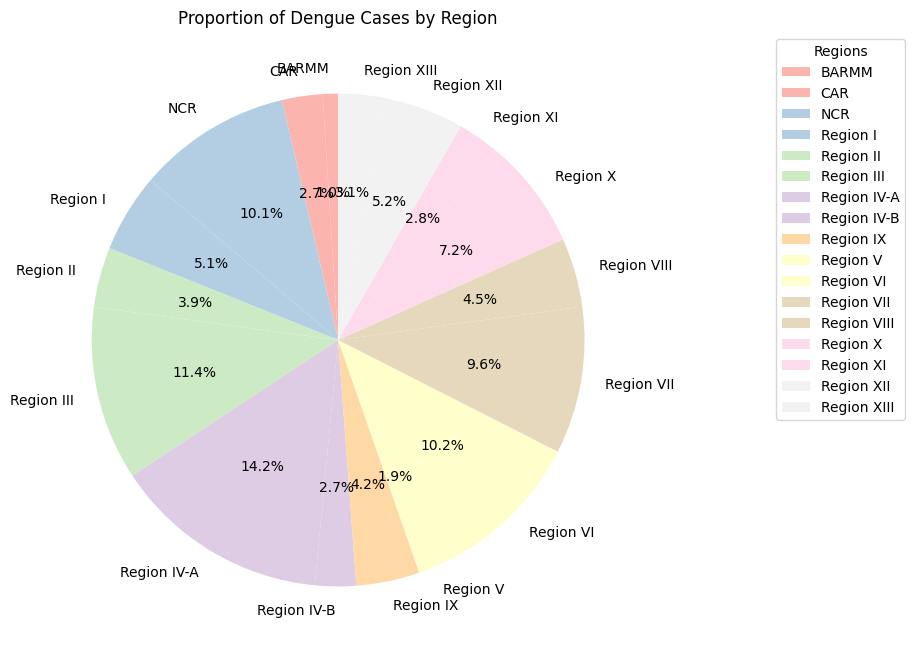

In [19]:
reg_den = dengue.groupby("Region")["Dengue_Cases"].sum()
plt.figure(figsize=(8, 8))
reg_den.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="Pastel1")
plt.title("Proportion of Dengue Cases by Region")
plt.ylabel("")  # Removes default ylabel
plt.legend(title="Regions", bbox_to_anchor=(1.2, 1))
plt.show()

<h1>INSIGHT 9</h1>

<h3>The scatter plot for Region IV-A shows a trend where higher dengue case numbers generally lead to more deaths, but the relationship may vary across different periods. Major outbreaks, particularly in 2019, resulted in significant spikes in both cases and fatalities, suggesting increased strain on healthcare resources. Some months report higher death counts despite moderate case numbers, which could indicate delays in treatment or more severe dengue strains. The data highlights the need for strengthened medical response and preventive strategies to mitigate dengue fatalities in high-risk periods.
</h3>

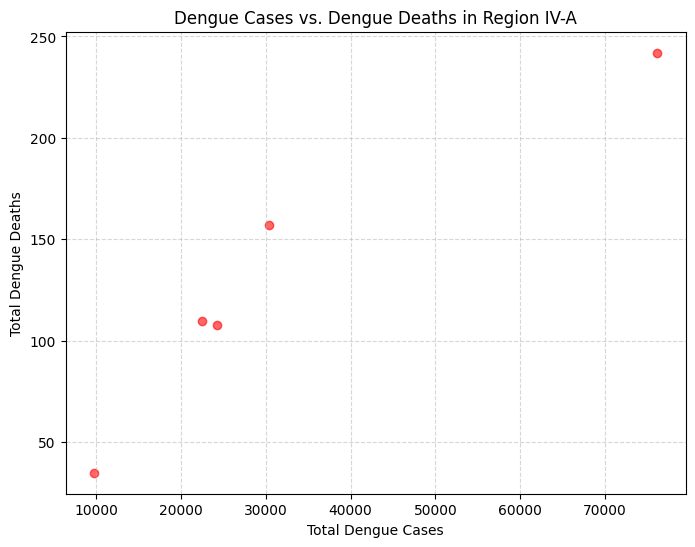

In [20]:
region_iva_data = dengue[dengue["Region"] == "Region IV-A"]
region_iva_summary = region_iva_data.groupby("Year").agg(
    Total_Cases=("Dengue_Cases", "sum"),
    Total_Deaths=("Dengue_Deaths", "sum"),
    Fatality_Rate=("Dengue_Deaths", "mean")  # Average fatalities per month
).reset_index()
correlation = region_iva_summary["Total_Cases"].corr(region_iva_summary["Total_Deaths"])
plt.figure(figsize=(8, 6))
plt.scatter(region_iva_summary["Total_Cases"], region_iva_summary["Total_Deaths"], alpha=0.6, color="red")
plt.title("Dengue Cases vs. Dengue Deaths in Region IV-A")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Total Dengue Deaths")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<h1>INSIGHT 10</h1>

<h3>The line plot for Region IV-A illustrates significant fluctuations in yearly dengue cases, with a pronounced peak in 2019, indicating a major outbreak. The spike suggests increased mosquito activity and possibly delayed intervention measures, which contributed to widespread transmission. A sharp decline in cases is observed in 2020, likely due to COVID-19 restrictions that limited mobility and exposure to breeding sites. This trend highlights the need for early detection, sustained mosquito control programs, and enhanced public health awareness to minimize future outbreaks and prevent sharp spikes in infections.</h3>


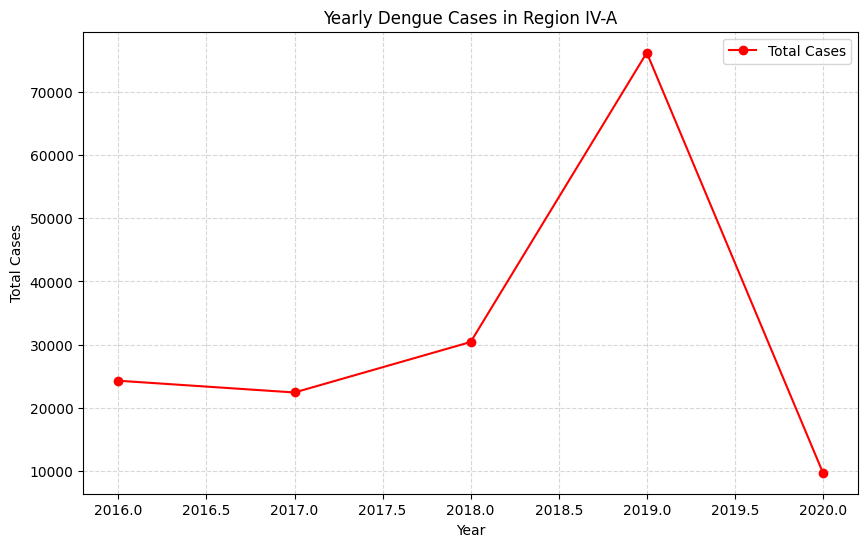

In [21]:
yearly_summary = region_iva_data.groupby("Year").agg(
    Total_Cases=("Dengue_Cases", "sum"),
    Total_Deaths=("Dengue_Deaths", "sum"),
    Fatality_Rate=("Dengue_Deaths", "mean")  # Average deaths per month
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_summary["Year"], yearly_summary["Total_Cases"], marker="o", color="red", label="Total Cases")
plt.title("Yearly Dengue Cases in Region IV-A")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()





<h1>INSIGHT 11</h1>

<h3>The line plot for Region IV-A reveals notable variations in yearly dengue deaths, with a sharp peak in 2019, reflecting the severity of the outbreak during that year. The increase in fatalities aligns with the spike in dengue cases, indicating higher transmission rates and possible healthcare challenges in managing severe cases. The significant drop in 2020 suggests the impact of COVID-19 restrictions, which may have helped limit exposure to mosquito breeding sites. This trend highlights the importance of strengthened healthcare systems, early intervention, and continuous dengue prevention programs, especially in high-risk periods.</h3>


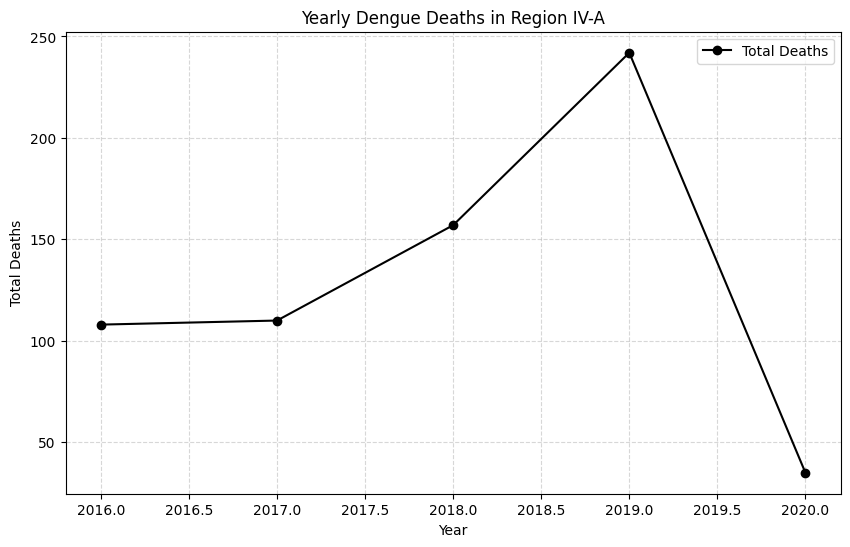

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_summary["Year"], yearly_summary["Total_Deaths"], marker="o", color="black", label="Total Deaths")
plt.title("Yearly Dengue Deaths in Region IV-A")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

<h1>INSIGHT 12</h1>

<h3>The bar chart for Region IV-A highlights a clear seasonal pattern, with dengue cases peaking between July and October. These months coincide with the rainy season, providing optimal conditions for mosquito breeding. The sharp increase in cases during this period suggests that preventive measures should be ramped up before peak months to curb transmission. Meanwhile, case numbers drop significantly from December to May, reinforcing the effectiveness of mosquito control efforts when environmental conditions are less favorable for disease spread. These insights emphasize the importance of timely intervention and sustained public health campaigns to mitigate dengue outbreaks.</h3>


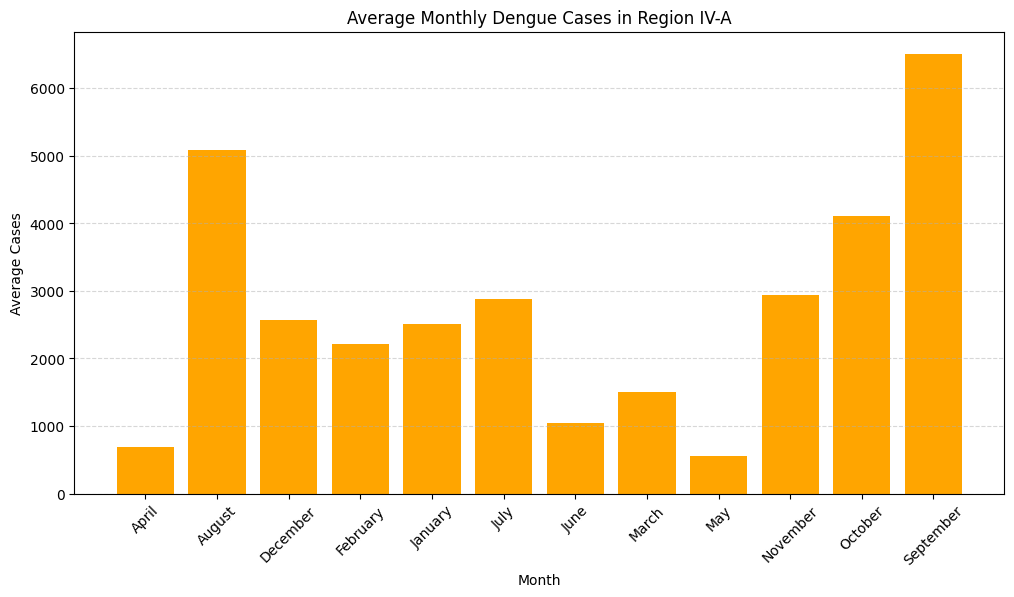

In [23]:
monthly_summary = region_iva_data.groupby("Month").agg(
    Avg_Cases=("Dengue_Cases", "mean"),
    Avg_Deaths=("Dengue_Deaths", "mean")
).reset_index()


plt.figure(figsize=(12, 6))
plt.bar(monthly_summary["Month"], monthly_summary["Avg_Cases"], color="orange")
plt.title("Average Monthly Dengue Cases in Region IV-A")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()



<h1>INSIGHT 13</h1>

<h3>The bar chart for Region IV-A shows a distinct seasonal pattern in dengue-related deaths, with fatalities peaking between July and October—the same months when dengue cases surge. This correlation suggests that during peak transmission periods, healthcare systems may face strain, leading to delays in treatment and higher mortality rates. The decline in deaths from November to May indicates lower infection rates and possibly improved patient recovery outcomes. These findings emphasize the urgency of early hospital preparedness, rapid diagnosis, and enhanced treatment accessibility, particularly before peak months to minimize fatalities.</h3>


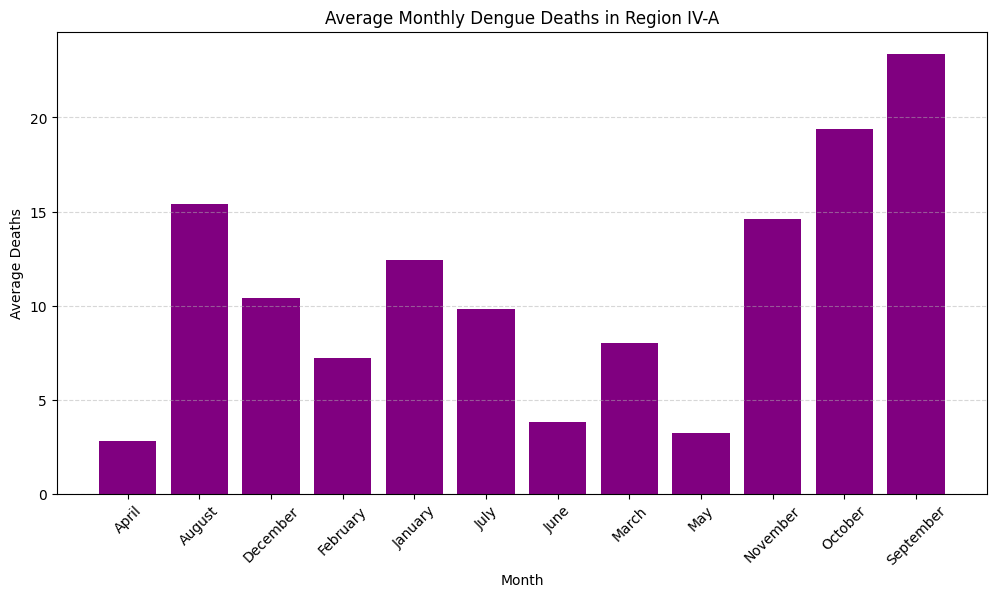

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_summary["Month"], monthly_summary["Avg_Deaths"], color="purple")
plt.title("Average Monthly Dengue Deaths in Region IV-A")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

<h1>INSIGHT 14</h1>

<h3>The line plot for NCR shows a fluctuating trend in yearly dengue cases, with 2019 recording a major outbreak, mirroring national patterns. The sharp rise in cases during this year suggests increased mosquito activity, environmental factors, or potential lapses in prevention efforts. A steep decline in 2020 aligns with COVID-19 restrictions, which may have impacted mosquito exposure and reporting accuracy. Given NCR’s high population density, proactive strategies like strengthened community engagement, intensified mosquito control, and early warning systems are crucial in preventing future surges.</h3>


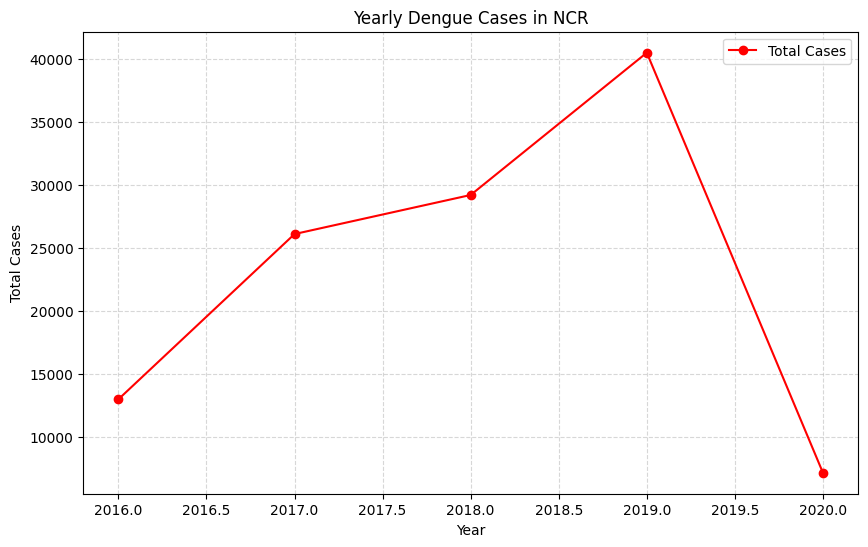

In [25]:
ncr_data = dengue[dengue["Region"] == "NCR"]
ncr_yearly_summary = ncr_data.groupby("Year").agg(
    Total_Cases=("Dengue_Cases", "sum"),
    Total_Deaths=("Dengue_Deaths", "sum"),
    Avg_Fatality_Rate=("Dengue_Deaths", "mean")
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(ncr_yearly_summary["Year"], ncr_yearly_summary["Total_Cases"], marker="o", color="red", label="Total Cases")
plt.title("Yearly Dengue Cases in NCR")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

<h1>INSIGHT 15</h1>

<h3>The line plot for NCR highlights yearly variations in dengue-related deaths, showing a sharp increase in 2019, which coincides with the surge in cases during that year. The elevated fatality count suggests possible strain on healthcare facilities, delays in medical intervention, or a higher prevalence of severe dengue cases. The significant drop in deaths in 2020 aligns with reduced dengue cases, potentially due to COVID-19 movement restrictions limiting mosquito exposure. These findings underscore the need for stronger hospital preparedness, improved case management strategies, and intensified early detection programs, especially in densely populated urban areas like NCR.</h3>

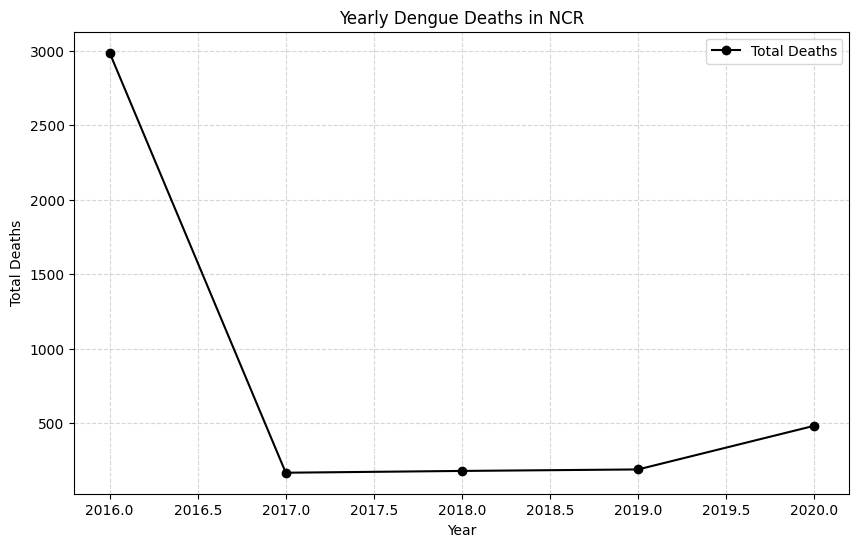

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(ncr_yearly_summary["Year"], ncr_yearly_summary["Total_Deaths"], marker="o", color="black", label="Total Deaths")
plt.title("Yearly Dengue Deaths in NCR")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()



<h1>INSIGHT 16</h1>

<h3>The bar chart for NCR reveals a seasonal trend in dengue cases, with a sharp increase observed between July and October. This pattern aligns with the rainy season, which creates favorable conditions for mosquito breeding and disease transmission. Case numbers begin to decline from November onwards, suggesting a reduction in mosquito activity and possible improvements in public health interventions. The consistency of this trend across multiple years highlights the need for proactive measures, such as intensified mosquito control efforts and early detection programs, before peak transmission months.</h3>


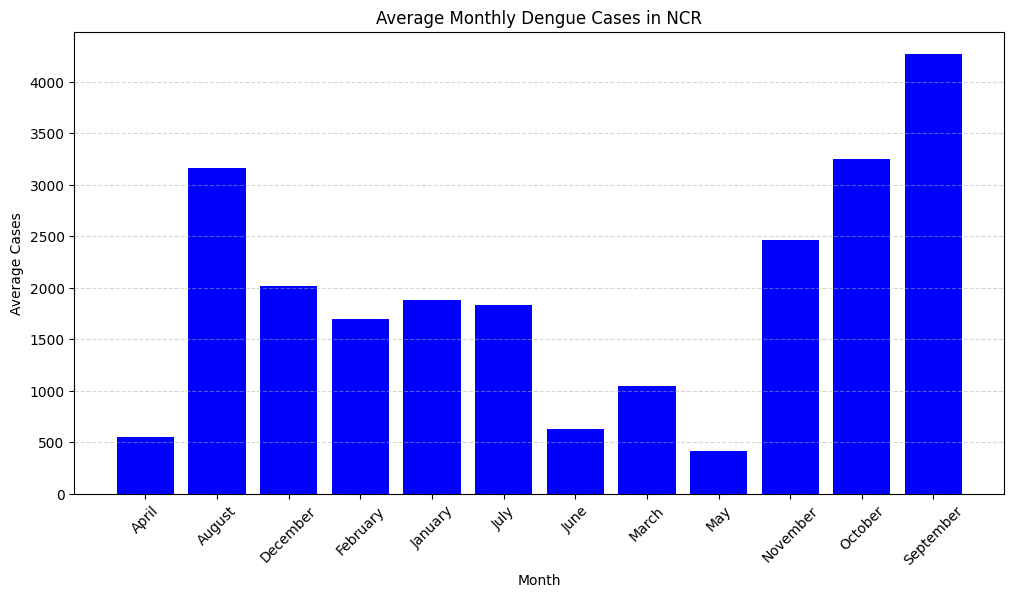

In [27]:
ncr_monthly_summary = ncr_data.groupby("Month").agg(
    Avg_Cases=("Dengue_Cases", "mean"),
    Avg_Deaths=("Dengue_Deaths", "mean")
).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(ncr_monthly_summary["Month"], ncr_monthly_summary["Avg_Cases"], color="blue")
plt.title("Average Monthly Dengue Cases in NCR")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

<h1>INSIGHT 17</h1>

<h3>The bar chart for NCR shows a clear seasonal trend in dengue-related deaths, with fatalities peaking between July and October. This pattern aligns with the months when dengue cases are at their highest, suggesting an increased burden on healthcare facilities during these periods. The decline in deaths from November onward reflects reduced infection rates and possibly improved treatment outcomes. These findings highlight the importance of strengthening medical preparedness, ensuring early detection, and sustaining mosquito control efforts to reduce fatalities during peak dengue seasons.</h3>


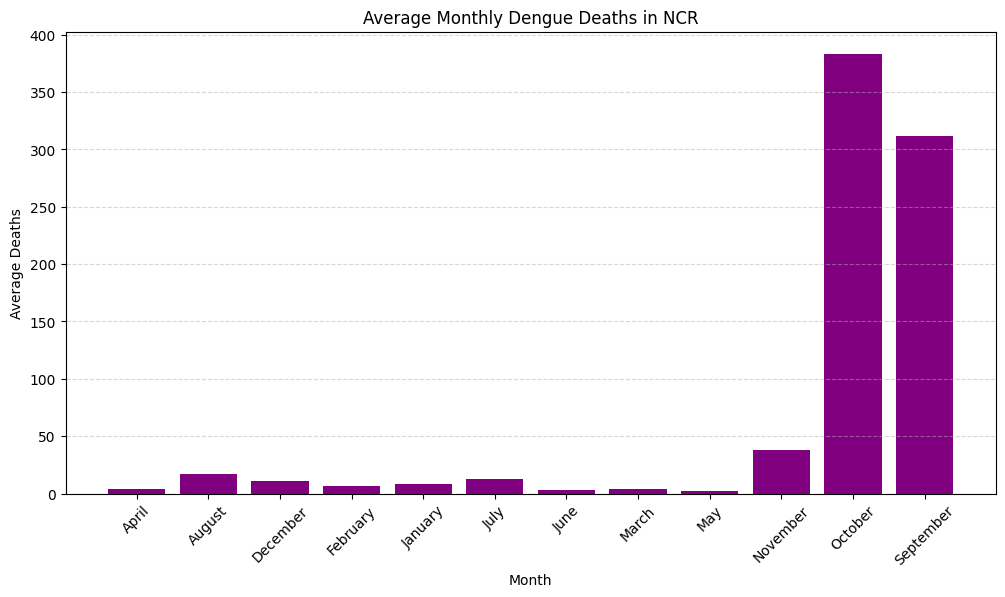

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(ncr_monthly_summary["Month"], ncr_monthly_summary["Avg_Deaths"], color="purple")
plt.title("Average Monthly Dengue Deaths in NCR")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

<h1>INSIGHT 18</h1>

<h3>The stacked bar chart illustrates the variation in dengue cases across different regions and years. Region IV-A, NCR, and Region VI consistently report high case numbers, indicating ongoing dengue transmission in densely populated areas. The data reveals a significant increase in cases in 2019, reflecting a severe outbreak that affected multiple regions. The decline in 2020 suggests external factors, such as movement restrictions during the COVID-19 pandemic, may have played a role in reducing transmission rates. These trends highlight the need for targeted interventions, including improved mosquito control, early detection programs, and resource allocation in high-risk areas.</h3>

<Figure size 1200x600 with 0 Axes>

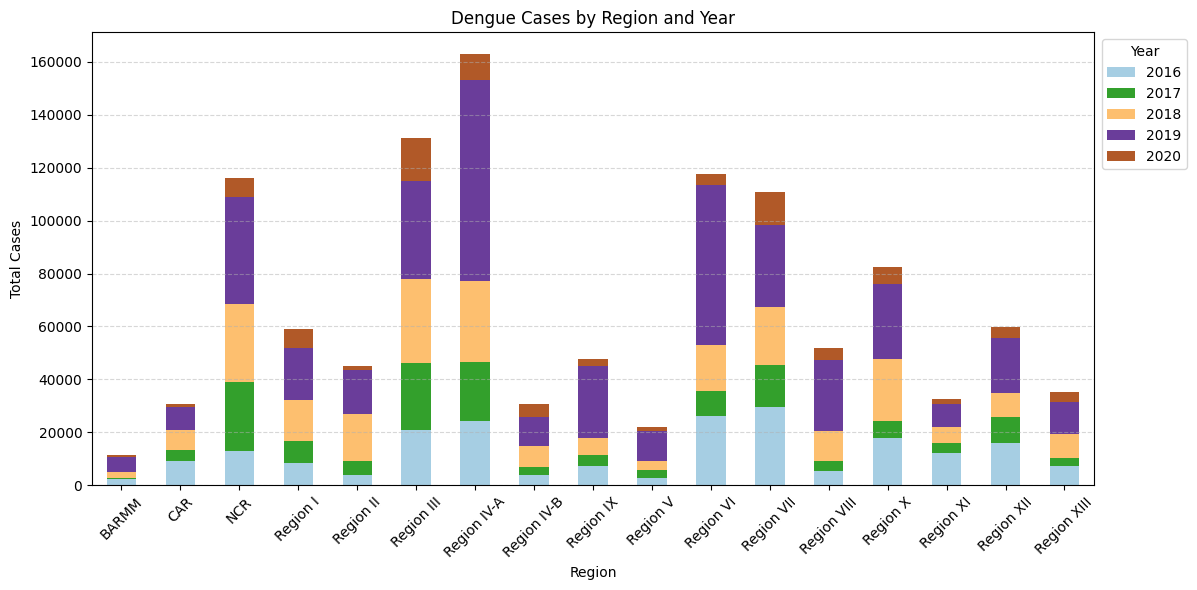

In [29]:

reg_year_den = dengue.groupby(["Region", "Year"])["Dengue_Cases"].sum().unstack()

# Plot stacked bar chart for better comparison
plt.figure(figsize=(12, 6))
reg_year_den.plot(kind="bar", stacked=True, colormap="Paired", figsize=(12, 6))
plt.title("Dengue Cases by Region and Year")
plt.xlabel("Region")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
